# Lab 7
Majo Gil 20337

Joshua Chicoj 20566

In [23]:
# imports
import pandas as pd
import tensorflow as tf
import numpy as np
import chardet
import re
from collections import Counter

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import networkx as nx
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pendiente\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
import json


file_path = 'tioberny.txt'  
data_list = []


with open(file_path, 'rb') as file:
    raw_data = file.read(10000)  
    result = chardet.detect(raw_data)
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")



with open(file_path, 'r', encoding=encoding, errors='replace') as file:
    for line in file:

        line = line.strip()
        if not line:
            continue
        try:

            data = json.loads(line)
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON on line: {line[:50]}...")  
            print(f"Error: {e}")


df = pd.json_normalize(data_list)

Detected encoding: UTF-16


In [12]:
df

,id,id_str,url,date,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,...,quotedTweet.quotedTweet.inReplyToTweetIdStr,quotedTweet.quotedTweet.inReplyToUser,quotedTweet.quotedTweet.source,quotedTweet.quotedTweet.sourceUrl,quotedTweet.quotedTweet.sourceLabel,quotedTweet.quotedTweet.media.photos,quotedTweet.quotedTweet.media.videos,quotedTweet.quotedTweet.media.animated,quotedTweet.quotedTweet.card,quotedTweet.quotedTweet._type
0,1834281080029110288,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-09-12 17:21:03+00:00,es,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1834252464092069901,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-09-12 15:27:20+00:00,es,#URGENTE Lo que los medios #faferos no informa...,12,80,142,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1834280919336976681,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-09-12 17:20:25+00:00,es,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1834280512933732694,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-09-12 17:18:48+00:00,es,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1834279986254987428,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-09-12 17:16:42+00:00,es,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,1832570119563743682,1832570119563743682,https://x.com/Benjamdc7/status/183257011956374...,2024-09-08 00:02:18+00:00,es,@marvgcaceres @diaco_gt @GuatemalaGob @vinicio...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5015,1832569640079270018,1832569640079270018,https://x.com/lfarivas/status/1832569640079270018,2024-09-08 00:00:24+00:00,es,@Soygeorgegt Lastima @BArevalodeLeon la gente ...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5016,1832569563109896313,1832569563109896313,https://x.com/MynorAroldopab1/status/183256956...,2024-09-08 00:00:05+00:00,es,Alguien sabe si este precio es culpa de @BArev...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5017,1832568528508968963,1832568528508968963,https://x.com/extasisvgames/status/18325685285...,2024-09-07 23:55:59+00:00,es,@guate_opina @BArevalodeLeon Y los diputados p...,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

list(df.columns)

['id',
 'id_str',
 'url',
 'date',
 'lang',
 'rawContent',
 'replyCount',
 'retweetCount',
 'likeCount',
 'quoteCount',
 'bookmarkedCount',
 'conversationId',
 'conversationIdStr',
 'hashtags',
 'cashtags',
 'mentionedUsers',
 'links',
 'viewCount',
 'retweetedTweet',
 'place',
 'coordinates',
 'inReplyToTweetId',
 'inReplyToTweetIdStr',
 'inReplyToUser',
 'source',
 'sourceUrl',
 'sourceLabel',
 'card',
 '_type',
 'user.id',
 'user.id_str',
 'user.url',
 'user.username',
 'user.displayname',
 'user.rawDescription',
 'user.created',
 'user.followersCount',
 'user.friendsCount',
 'user.statusesCount',
 'user.favouritesCount',
 'user.listedCount',
 'user.mediaCount',
 'user.location',
 'user.profileImageUrl',
 'user.profileBannerUrl',
 'user.protected',
 'user.verified',
 'user.blue',
 'user.blueType',
 'user.descriptionLinks',
 'user.pinnedIds',
 'user._type',
 'quotedTweet.id',
 'quotedTweet.id_str',
 'quotedTweet.url',
 'quotedTweet.date',
 'quotedTweet.user.id',
 'quotedTweet.user.id

## Limpieza de datos

In [13]:
relevant_columns = [
    'id', 'date', 'rawContent', 'replyCount', 'retweetCount',
    'likeCount', 'quoteCount', 'mentionedUsers', 'hashtags',
    'user.username', 'user.followersCount', 'user.verified', 'user.location', 
    'quotedTweet.user.username', 'quotedTweet.hashtags', 'inReplyToUser.username'
]
df = df[relevant_columns]


df = df.dropna(subset=['rawContent'])


df['mentionedUsers'] = df['mentionedUsers'].apply(lambda x: [user['username'] for user in x] if isinstance(x, list) else [])

stop_words = set(stopwords.words('spanish'))

def clean_text(text):

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    text = text.lower()
    
    text_tokens = text.split()
    filtered_text = ' '.join([word for word in text_tokens if word not in stop_words])
    return filtered_text


df['cleanedContent'] = df['rawContent'].apply(clean_text)


df = df.drop_duplicates(subset=['id'])

df.head()

,id,date,rawContent,replyCount,retweetCount,likeCount,quoteCount,mentionedUsers,hashtags,user.username,user.followersCount,user.verified,user.location,quotedTweet.user.username,quotedTweet.hashtags,inReplyToUser.username,cleanedContent
0,1834281080029110288,2024-09-12 17:21:03+00:00,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,0,"[usembassyguate, 48CantonesToto, USAIDGuate, U...",[],La_ReVoluZzion,2102,False,Cuba 🇨🇺,XelaNewsGt,"[URGENTE, faferos, BernardoArévalo, NebajQuich...",NaN,confirmado compaeres impuesto usembassyguate s...
1,1834252464092069901,2024-09-12 15:27:20+00:00,#URGENTE Lo que los medios #faferos no informa...,12,80,142,15,[],"[URGENTE, faferos, BernardoArévalo, NebajQuich...",XelaNewsGt,3462,False,Guatemala,NaN,NaN,NaN,urgente medios faferos informaron ayer acerca ...
2,1834280919336976681,2024-09-12 17:20:25+00:00,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,0,"[IvanDuque, BArevalodeLeon]",[],M24095273,30,False,,NaN,NaN,IvanDuque,ivanduque barevalodeleon usaste pegasus espiar...
3,1834280512933732694,2024-09-12 17:18:48+00:00,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,0,"[IvanDuque, BArevalodeLeon]",[],carlosalbesc,11,False,,NaN,NaN,IvanDuque,ivanduque barevalodeleon entienden bien s estn...
4,1834279986254987428,2024-09-12 17:16:42+00:00,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,0,"[BArevalodeLeon, KarinHerreraVP, AGN_noticias,...",[],Brenda_AGN,564,False,Guatemala,NaN,NaN,NaN,presidente barevalodeleon vicepresidenta karin...


In [21]:
df['connections'] = df.apply(lambda row: list(
    set(
        row['mentionedUsers'] + 
        ([row['quotedTweet.user.username']] if pd.notna(row['quotedTweet.user.username']) else []) + 
        ([row['inReplyToUser.username']] if pd.notna(row['inReplyToUser.username']) else [])
    )
), axis=1)
df.head()

,id,date,rawContent,replyCount,retweetCount,likeCount,quoteCount,mentionedUsers,hashtags,user.username,user.followersCount,user.verified,user.location,quotedTweet.user.username,quotedTweet.hashtags,inReplyToUser.username,cleanedContent,connections
0,1834281080029110288,2024-09-12 17:21:03+00:00,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,0,"[usembassyguate, 48CantonesToto, USAIDGuate, U...",[],La_ReVoluZzion,2102,False,Cuba 🇨🇺,XelaNewsGt,"[URGENTE, faferos, BernardoArévalo, NebajQuich...",NaN,confirmado compaeres impuesto usembassyguate s...,"[USAIDGuate, UEGuatemala, 48CantonesToto, usem..."
1,1834252464092069901,2024-09-12 15:27:20+00:00,#URGENTE Lo que los medios #faferos no informa...,12,80,142,15,[],"[URGENTE, faferos, BernardoArévalo, NebajQuich...",XelaNewsGt,3462,False,Guatemala,NaN,NaN,NaN,urgente medios faferos informaron ayer acerca ...,[]
2,1834280919336976681,2024-09-12 17:20:25+00:00,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,0,"[IvanDuque, BArevalodeLeon]",[],M24095273,30,False,,NaN,NaN,IvanDuque,ivanduque barevalodeleon usaste pegasus espiar...,"[BArevalodeLeon, IvanDuque]"
3,1834280512933732694,2024-09-12 17:18:48+00:00,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,0,"[IvanDuque, BArevalodeLeon]",[],carlosalbesc,11,False,,NaN,NaN,IvanDuque,ivanduque barevalodeleon entienden bien s estn...,"[BArevalodeLeon, IvanDuque]"
4,1834279986254987428,2024-09-12 17:16:42+00:00,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,0,"[BArevalodeLeon, KarinHerreraVP, AGN_noticias,...",[],Brenda_AGN,564,False,Guatemala,NaN,NaN,NaN,presidente barevalodeleon vicepresidenta karin...,"[KarinHerreraVP, BArevalodeLeon, CongresoGuate..."


## Análisis Exploratorio

In [6]:

total_tweets = len(df)

unique_users = df['user.username'].nunique()
total_mentions = df['mentionedUsers'].apply(len).sum()
total_hashtags = df['hashtags'].apply(len).sum()
engagement_stats = df[['replyCount', 'retweetCount', 'likeCount', 'quoteCount']].sum()

print(f"Total de Tweets: {total_tweets}")
print(f"Usuarios Únicos: {unique_users}")
print(f"Menciones Totales: {total_mentions}")
print(f"Hashtags Totales: {total_hashtags}")
print(f"Interacciones Totales:\n{engagement_stats}")


Total de Tweets: 4944
Usuarios Únicos: 2620
Menciones Totales: 17242
Hashtags Totales: 383
Interacciones Totales:
replyCount       30251
retweetCount     85030
likeCount       432662
quoteCount        7107
dtype: int64


In [7]:

hashtag_list = df['hashtags'].explode().dropna().tolist()
hashtag_counts = Counter(hashtag_list).most_common(10)

mention_list = df['mentionedUsers'].explode().dropna().tolist()
mention_counts = Counter(mention_list).most_common(10)

print("Hashtags más frecuentes:", hashtag_counts)
print("Menciones más frecuentes:", mention_counts)


Hashtags más frecuentes: [('GuatemalaSaleAdelante', 24), ('MinfinSaleAdelante', 17), ('URGENTE', 16), ('Presupuesto2025', 14), ('UnPresupuestoParaLaPoblación', 13), ('Guatemala', 13), ('EnElPaísDCA', 12), ('NacionalesAGN', 8), ('AHORA', 5), ('TraficoGT', 5)]
Menciones más frecuentes: [('BArevalodeLeon', 4806), ('GuatemalaGob', 909), ('UbaldoMacu', 574), ('santipalomov', 524), ('MPguatemala', 466), ('FJimenezmingob', 403), ('mingobguate', 289), ('__VaderTG', 272), ('CongresoGuate', 254), ('DiariodeCA', 219)]


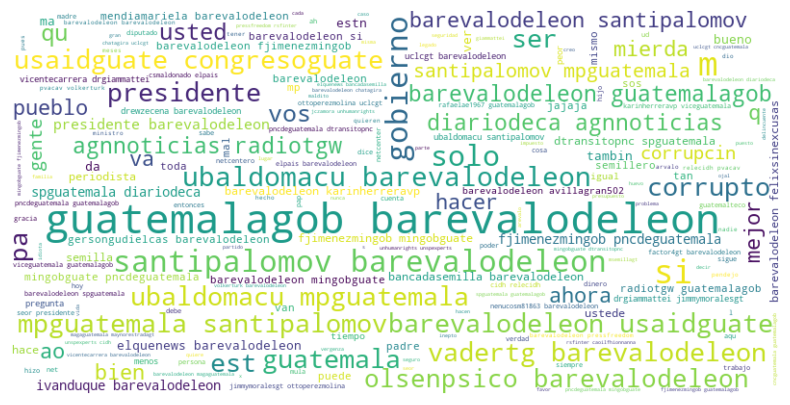

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df['cleanedContent'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [9]:

user_interactions = df.groupby('user.username')[['replyCount', 'retweetCount', 'likeCount', 'quoteCount']].sum()

# Mostrar los usuarios más activos (con más interacciones)
most_active_users = user_interactions.sort_values(by='retweetCount', ascending=False).head(10)
print(most_active_users)


                 replyCount  retweetCount  likeCount  quoteCount
user.username                                                   
JMilei                 8336         14643      88512        1872
pablocasx1              863          6592      34864         326
AMAZlNGNATURE           901          5221      59391         597
petrogustavo           4160          5203      12639         550
nayibbukele             952          4685      35043         237
Arteymas_               378          4570      67416         243
DanteForesi            1124          3223       6810         147
monerorictus             76          3016       9284          45
capTercio                72          2846       7996          78
MayraDo57466678         196          2818       7135         125


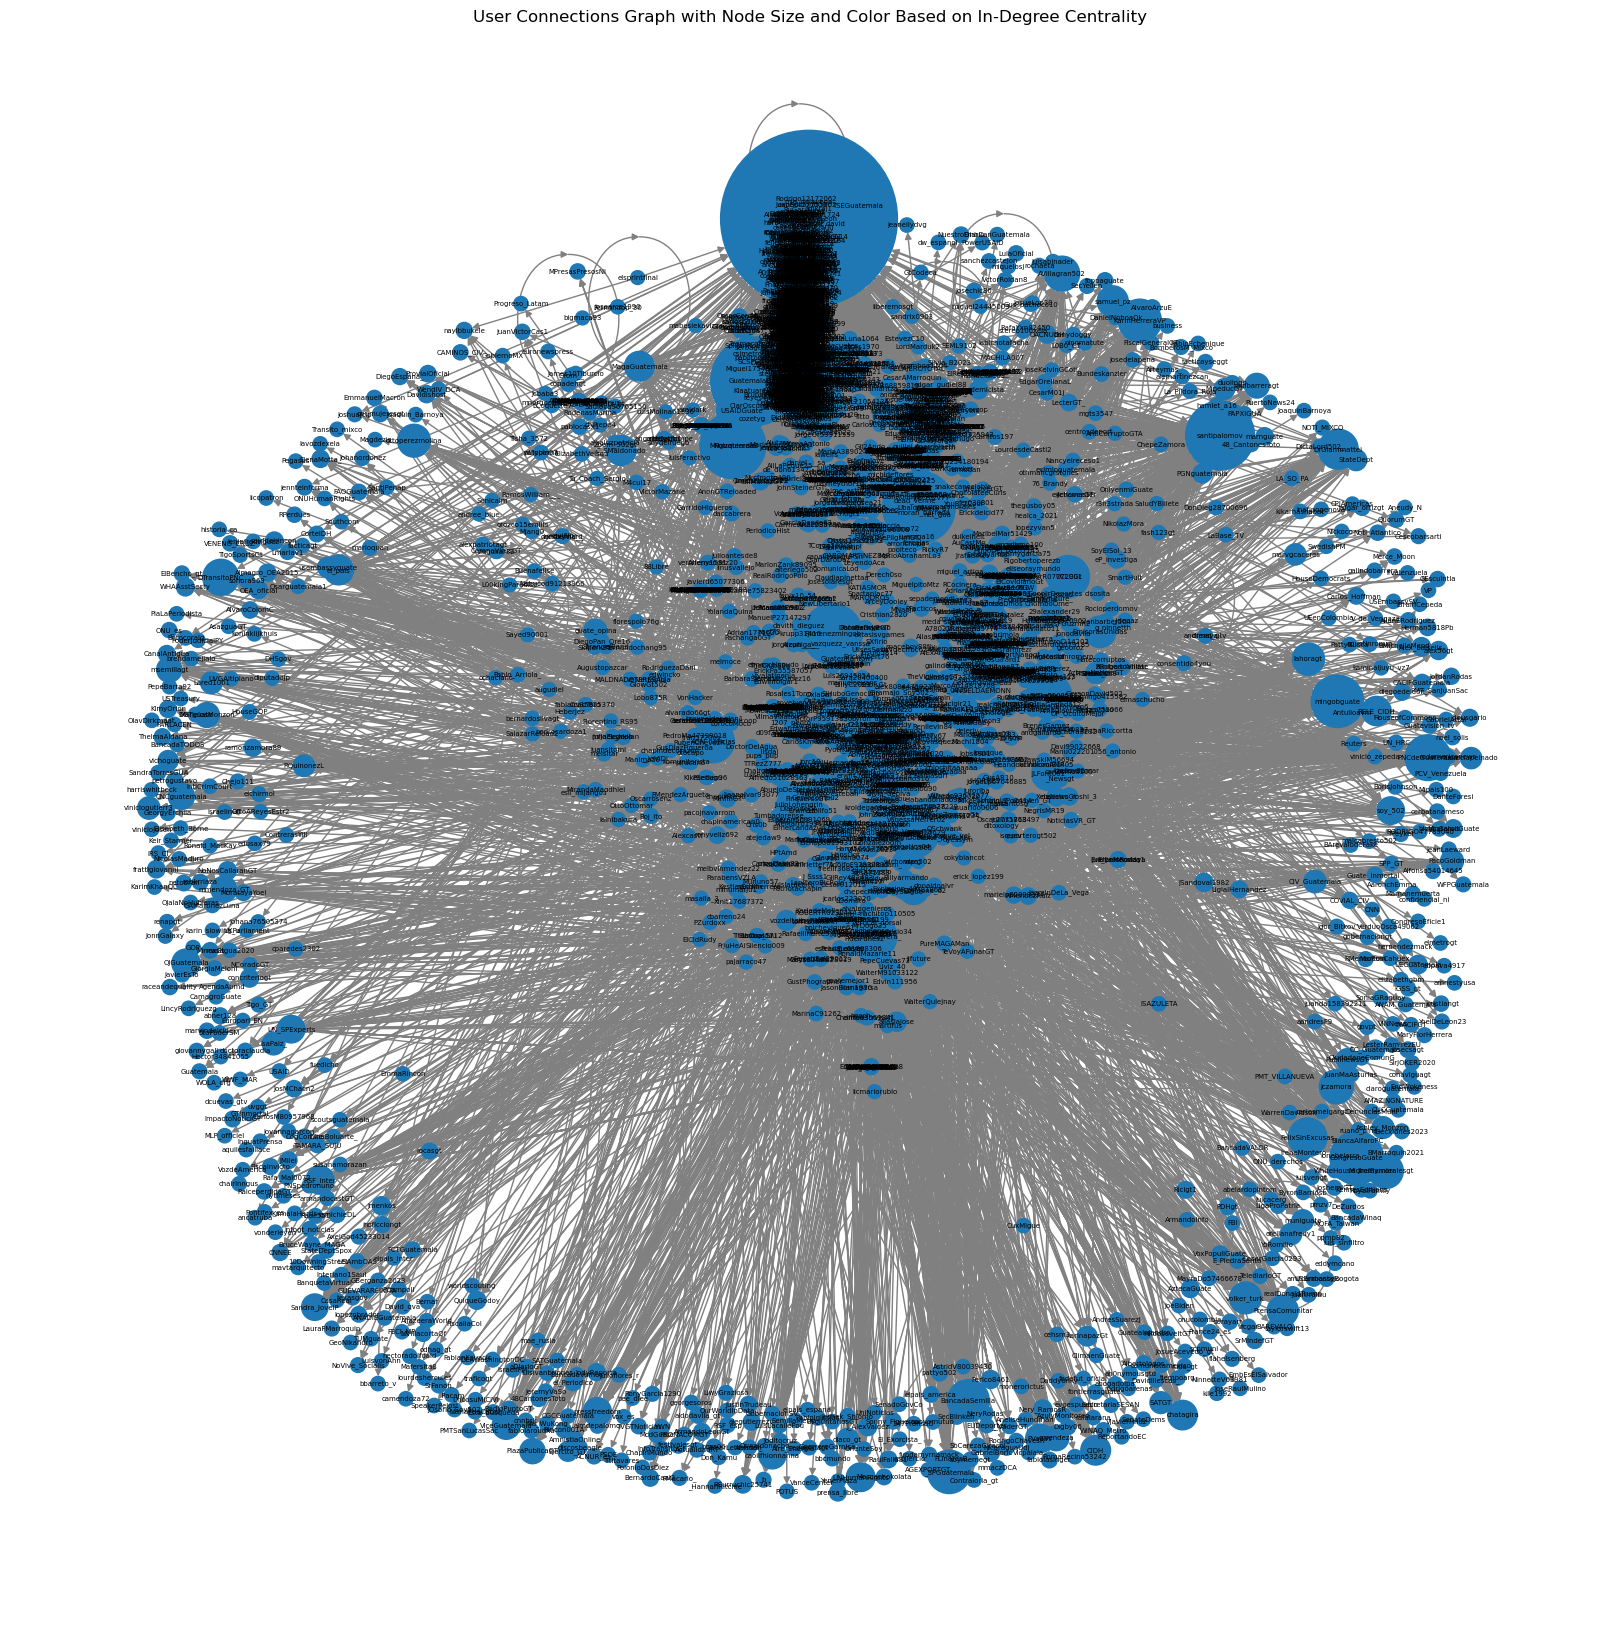

In [40]:
# Create directed graph
G = nx.DiGraph()

# Add edges to the graph based on connections
for index, row in df.iterrows():
    user = row['user.username']
    for connection in row['connections']:
        G.add_edge(user, connection)

# Calculate in-degree centrality (number of incoming edges for each node)
in_degree_centrality = nx.in_degree_centrality(G)

# Customize node size and color based on in-degree centrality
node_size = [20000 * in_degree_centrality[node] + 100 for node in G.nodes()]
node_color = [in_degree_centrality[node] for node in G.nodes()]

# Create the plot
plt.figure(figsize=(16, 16))
pos = nx.spring_layout(G)  # Layout for visualization

# Draw nodes with customized size and color
nodes = nx.draw(G, pos, with_labels=True, node_size=node_size, edge_color='gray', font_size=5, font_weight='regular')

plt.title("User Connections Graph with Node Size and Color Based on In-Degree Centrality")
plt.show()

In [41]:
for node, centrality in sorted(in_degree_centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"{node}: {centrality:.2f}")

BArevalodeLeon: 0.81
GuatemalaGob: 0.20
UbaldoMacu: 0.13
santipalomov: 0.12
MPguatemala: 0.11
FJimenezmingob: 0.09
CongresoGuate: 0.07
__VaderTG: 0.07
mingobguate: 0.07
USAIDGuate: 0.06
OlsenPsico: 0.05
DiariodeCA: 0.05
ElQueNews: 0.05
PNCdeGuatemala: 0.05
VicenteCarrera_: 0.04
_SPGuatemala: 0.04
KarinHerreraVP: 0.04
AGN_noticias: 0.04
UCLCGt: 0.04
BancadaSemilla: 0.04
Radio_TGW: 0.04
IvanDuque: 0.04
DrGiammattei: 0.04
FelixSinExcusas: 0.03
DTransitoPNC: 0.03
GersonGudielCas: 0.03
AVillagran502: 0.03
jimmymoralesgt: 0.03
MendiaMariela: 0.03
jczamora: 0.03
ottoperezmolina: 0.02
JLFont001: 0.02
drewzecena: 0.02
lahoragt: 0.02
volker_turk: 0.02
EmisorasUnidas: 0.02
PrensaComunitar: 0.02
samuel_pz: 0.02
Factor4_GT: 0.02
C_SMaldonado: 0.02
el_pais: 0.02
MagaGuatemala: 0.02
CIDH: 0.02
NenucosM81863: 0.02
chatagira: 0.02
RELE_CIDH: 0.02
RafaelAE1967: 0.02
PVacaV: 0.02
UNHumanRights: 0.02
MaynorEstradaGT: 0.02
OJGuatemala: 0.02
pressfreedom: 0.02
RSF_inter: 0.02
ViceGuatemala: 0.02
soy_502: 0.

In [ ]:
from networkx.algorithms.community import girvan_newman

communities = girvan_newman(G)
top_level_communities = next(communities)
print("Communities detected:")
for community in top_level_communities:
    print(community)